# Iman Noor
---

# **Exploring Cross-Validation, Overfitting and Underfitting**

## **Cross-Validation**
Cross-validation is a statistical method used to estimate the performance of machine learning models. It involves partitioning the data into subsets, training the model on some subsets (training set), and evaluating it on the remaining subsets (validation set). This process helps in assessing the model's ability to generalize to unseen data.

## **Overfitting**
Overfitting occurs when a machine learning model captures the noise in the training data rather than the underlying pattern. This results in a model that performs well on the training data but poorly on new, unseen data. We will discuss how to identify overfitting and strategies to prevent it.

## **Underfitting**
Underfitting happens when a model is too simple to capture the underlying pattern in the data. This results in poor performance on both the training and validation sets. We will cover techniques to detect and address underfitting.


---
## Importing necessary tools


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

## Data Preparation

In [2]:
X = np.random.rand(100, 1)
y = 3 * X.squeeze() + 2 + np.random.randn(100)

---
## 📘 **Cross-Validation**
Cross-validation is a technique used to assess the performance and generalization ability of a model by partitioning the dataset into multiple subsets or folds.

### Formula:
- **k-Fold Cross-Validation**:
    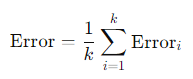
    
### Key Types

1. **k-Fold Cross-Validation**:
   - Split the data into `k` equal parts (folds).
   - Train the model on `k-1` folds and test on the remaining fold.
   - Repeat `k` times, each time using a different fold as the test set.
   - Average the results to get the final performance metric.

2. **Stratified k-Fold Cross-Validation**:
   - Similar to k-Fold but ensures each fold has a similar class distribution to the entire dataset.
   - Useful for imbalanced datasets.

3. **Leave-One-Out Cross-Validation (LOOCV)**:
   - Each data point is used once as a test set while the remaining points form the training set.
   - Computationally intensive but useful for small datasets.

4. **Holdout Method**:
   - Split the data into a single training set and a single test set.
   - Simple but less reliable due to potential high variance.


In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
results = cross_val_score(model, X, y, cv=kf)

print('Cross-Validation Scores:', results)
print('Mean Cross-Validation Score:', np.mean(results))

Cross-Validation Scores: [0.57352371 0.4469848  0.52515976 0.52873098 0.65274   ]
Mean Cross-Validation Score: 0.5454278487068475


---

## 📘 **Overfitting**
Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts its performance on new, unseen data. 

### Characteristics:
- High accuracy on training data but low accuracy on test data.
- Model complexity is too high.

###  Formula:
- **Overfitting can be detected by comparing training and validation error rates.**
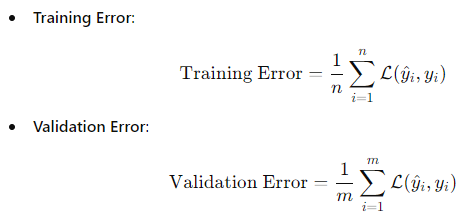



In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Overfitting with a deep decision tree

In [6]:
overfit_model = DecisionTreeRegressor(max_depth=10)
overfit_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [7]:
from sklearn.tree import plot_tree

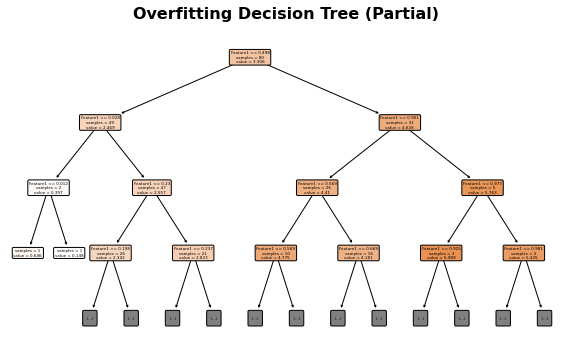

In [8]:
# Display the overfit decision tree
plt.figure(figsize=(10, 6))
plot_tree(overfit_model, filled=True, rounded=True, feature_names=["Feature1"], max_depth=3, impurity=False)
plt.title('Overfitting Decision Tree (Partial)', weight='bold', fontsize=16)
plt.show()

## Predictions

In [9]:
y_train_pred = overfit_model.predict(X_train)
y_test_pred = overfit_model.predict(X_test)

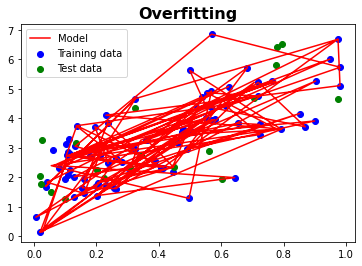

In [10]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X, overfit_model.predict(X), color='red', label='Model')
plt.legend()
plt.title('Overfitting', weight='bold', fontsize=16)
plt.show()

In [11]:
train_error = np.mean((y_train_pred - y_train) ** 2)
test_error = np.mean((y_test_pred - y_test) ** 2)

print(f'Training Error: {train_error}')
print(f'Test Error: {test_error}')

Training Error: 0.023086209043375217
Test Error: 2.4667608848350246


---

## 📘 **Underfitting**
Underfitting occurs when a model is too simple to capture the underlying patterns in the data. 

### Characteristics:
- Low accuracy on both training and test data.
- Model complexity is too low.

### Formula:
- **Underfitting can be detected by high training and validation error rates.**
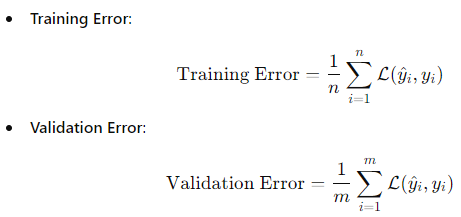


## Underfitting with a shallow decision tree

In [12]:
underfit_model = DecisionTreeRegressor(max_depth=1)
underfit_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

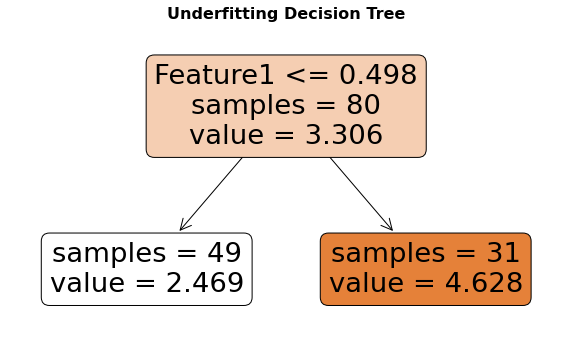

In [13]:
# Display the underfit decision tree
plt.figure(figsize=(10, 6))
plot_tree(underfit_model, filled=True, rounded=True, feature_names=['Feature1'], impurity=False)
plt.title('Underfitting Decision Tree', weight='bold', fontsize=16)
plt.show()

## Predictions

In [14]:
y_train_pred_underfit = underfit_model.predict(X_train)
y_test_pred_underfit = underfit_model.predict(X_test)

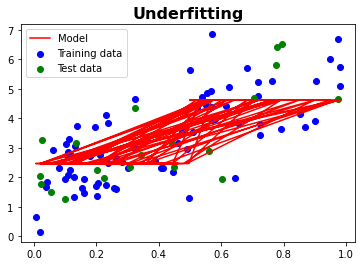

In [15]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X, underfit_model.predict(X), color='red', label='Model')
plt.legend()
plt.title('Underfitting', weight='bold', fontsize=16)
plt.show()

In [16]:
train_error_underfit = np.mean((y_train_pred_underfit - y_train) ** 2)
test_error_underfit = np.mean((y_test_pred_underfit - y_test) ** 2)

print(f'Training Error: {train_error_underfit}')
print(f'Test Error: {test_error_underfit}')

Training Error: 0.8785334694261706
Test Error: 1.3435957644287244


---

## 📘 **Confusion Matrix with Unique Shades**


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
# Sample classification data
X_class = np.random.rand(100, 2)
y_class = (X_class[:, 0] + X_class[:, 1] > 1).astype(int)

## Split the training and testing data

In [19]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

## Training the model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model_class = LogisticRegression()
model_class.fit(X_train_class, y_train_class)

LogisticRegression()

## Predictions

In [22]:
y_pred_class = model_class.predict(X_test_class)
y_pred_class

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

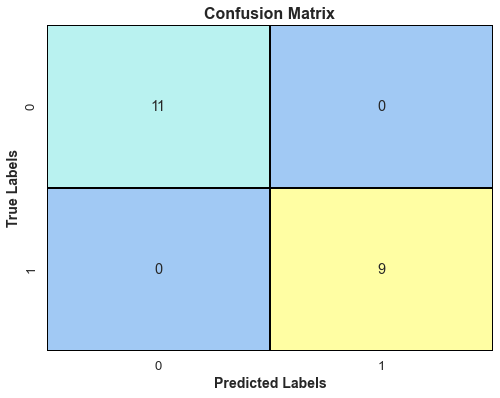

In [24]:
cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
custom_palette = sns.color_palette('pastel')
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_palette, cbar=False, linewidths=1, linecolor='black')

plt.xlabel('Predicted Labels', weight='bold', fontsize=14)
plt.ylabel('True Labels', weight='bold', fontsize=14)
plt.title('Confusion Matrix', weight='bold', fontsize=16)

plt.show()

### **Overfitting:**
Good performance on the training data, poor generliazation to other data.
### **Underfitting:**
Poor performance on the training data and poor generalization to other data
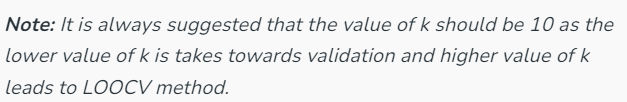

# **The End :)**